### Task: Discretize Amount - Does it have an impact?

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest,SelectFromModel
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from IPython.display import Image 
from sklearn.externals.six import StringIO 
import pydotplus

import graphviz
from graphviz import Source

from feature_engine import discretisers as dsc

%matplotlib inline


C:\Users\PriyaSriram\Anaconda3\envs\DataScience\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


### Read data into Pandas Dataframe

In [3]:
demo_data = pd.read_csv("Demographic_Data.csv")
demo_data.head(10)

,in-store,age,items,amount,region
0,0,37,4,281.0300,2
1,0,35,2,219.5100,2
2,1,45,3,1525.7000,4
3,1,46,3,715.2500,3
4,1,33,4,1937.5000,1
5,0,24,3,1314.2000,4
6,0,43,6,8.5472,2
7,1,66,5,819.9800,3
8,1,51,5,908.3100,1
9,1,47,3,767.5400,1


### 1. Choose input and target variable

In [4]:
X = demo_data[['in-store', 'age', 'items','amount']]
y = demo_data['region']


### 2. Discretize ' amount' -input variable using DecisionTreeDiscretiser

In [6]:
# set up the discretisation transformer
disc = dsc.DecisionTreeDiscretiser(cv=3,
                              scoring='accuracy',
                              variables=['amount'],
                              regression=False)

### 3. Transform 'amount' to discrete variable

In [7]:
# fit the transformer
disc.fit(X,y)

X_disc = disc.transform(X)
X_disc


,in-store,age,items,amount
0,0,37,4,0.520025
1,0,35,2,0.520025
2,1,45,3,0.000000
3,1,46,3,0.000000
4,1,33,4,0.000000
...,...,...,...,...
79995,1,71,3,0.000000
79996,0,59,7,0.000000
79997,0,54,1,0.520025
79998,1,49,4,0.520025


### 4. Train/test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_disc, y, test_size = .30, random_state=123,stratify=y)


### 4. Calculate Feature importance

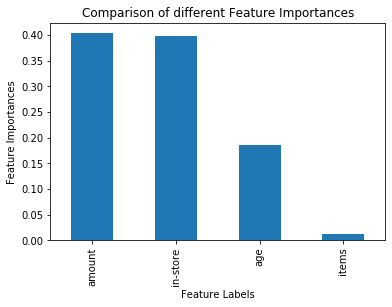

In [9]:
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
clf.feature_importances_  
 
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='bar')

# Labels for the plot
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()

### 5. Drop irrelavant feature from training and test data

In [10]:
X_train.drop('items',axis=1).head(5)
X_test.drop ('items',axis=1).head(5)

,in-store,age,amount
77472,0,51,0.520025
22247,0,79,0.520025
39461,1,21,0.520025
60404,1,31,0.000000
68248,1,32,0.520025


### 6. Choose a model using cross_val_score

In [11]:
# Compare all the three algorithms 
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('K nearest neighbors Classifier',KNeighborsClassifier()))

# To build and assess both models, we create an empty list to store the results and another to hold the name
# of each algorithm so we can easily print out the results and keep them separated as follows
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X_disc,y, cv=5, scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print (names[i],results[i].mean())

Random Forest Classifier 0.6120749999999999
Decision Tree Classifier 0.6109500000000001
K nearest neighbors Classifier 0.5834625000000001


###  61% accuracy on Cross_Validated data

### 7. Predict test data

In [12]:
y_pred = DecisionTreeClassifier().fit(X_train,y_train).predict(X_test)
print("Accuracy for Decision Tree:",accuracy_score(y_test, y_pred))
print("Confusion matrix:\n" ,confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = RandomForestClassifier().fit(X_train,y_train).predict(X_test)
print("Accuracy for Random Forest:",accuracy_score(y_test, y_pred))
print("Confusion matrix:\n" ,confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy for Decision Tree: 0.610625
Confusion matrix:
 [[2073    0  904 1823]
 [   0 6000    0    0]
 [1527  238 1068 2567]
 [1501  446  339 5514]]
              precision    recall  f1-score   support

           1       0.41      0.43      0.42      4800
           2       0.90      1.00      0.95      6000
           3       0.46      0.20      0.28      5400
           4       0.56      0.71      0.62      7800

    accuracy                           0.61     24000
   macro avg       0.58      0.58      0.57     24000
weighted avg       0.59      0.61      0.59     24000

Accuracy for Random Forest: 0.6107083333333333
Confusion matrix:
 [[1878    0 1025 1897]
 [   0 6000    0    0]
 [1392  238 1137 2633]
 [1361  446  351 5642]]
              precision    recall  f1-score   support

           1       0.41      0.39      0.40      4800
           2       0.90      1.00      0.95      6000
           3       0.45      0.21      0.29      5400
           4       0.55      0.72      0

### 61.2% accuracy on Test data

### 8. Tuning hyperparameters of Decision tree

In [13]:

# Assign the Classifier
classifier= DecisionTreeClassifier()

   
# Set up a dictionary of parameters that we want to tune
grid_param = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [2,3,4,5],
        'min_samples_split': [2, 5, 10, 15, 100],
        'min_samples_leaf': [1, 2, 5, 10], 
        'splitter': ['best','random']
        }


# Perform Grid search with the parameters
clf = GridSearchCV(estimator=classifier,
                   param_grid=grid_param,
                   scoring='accuracy',
                   cv=5,
                   n_jobs=-1)

# Fit the grid search
clf.fit(X_train, y_train)

# View The Best Parameters
print('Best Criterion:', clf.best_params_)


# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf, X_disc,y, cv=3, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

Best Criterion: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}

[0.6239547  0.62642967 0.62611565]

0.6255000076955649

0.001100191565396955


### 62.5% accuracy on Cross Validated data

### 9. Predict test data using the new hyperparameters

In [14]:
algo=DecisionTreeClassifier(criterion='gini',
                              max_depth=4, 
                              min_samples_leaf=10,
                              min_samples_split=2,
                              splitter='best')
model = algo.fit(X_train,y_train)

y_pred = model.predict(X_test)


# Assess the performance of the model on test data
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Confusion matrix:\n" ,confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.39      0.25      0.30      4800
           2       0.90      1.00      0.95      6000
           3       0.53      0.22      0.31      5400
           4       0.54      0.84      0.66      7800

    accuracy                           0.62     24000
   macro avg       0.59      0.58      0.55     24000
weighted avg       0.60      0.62      0.58     24000

Accuracy: 0.621375
Confusion matrix:
 [[1184    0 1030 2586]
 [   0 6000    0    0]
 [1012  238 1179 2971]
 [ 804  446    0 6550]]


### 62.1% accuracy on test data. There is a slight improvement in accuracy after tuning